In [11]:
%matplotlib widget

# 读取数据

In [3]:

sigmod0_npy_dir = train_dir + r'\\sigmod0\\npy\\'
aari_npy_dir = train_dir + r'\\mask\\aari\\npy\\'
aari_normail_npy_dir = train_dir + r'\\mask\\aari\\npy\\normail_npy\\'
osisaf_npy_dir = train_dir + r'\\mask\\osisaf\\npy\\'


In [4]:
sigmod0_npy_files = glob.glob(sigmod0_npy_dir + '*.npy')
aari_npy_files = glob.glob(aari_npy_dir + r'*.npy')
osisaf_npy_files = glob.glob(osisaf_npy_dir + r'*.npy')

osi_array = np.load(osisaf_npy_files[0])
aari_array = np.load(aari_npy_files[0])

new_osi_array = np.full(shape=osi_array.shape[:2], fill_value=0)
new_aari_array = np.full(shape=osi_array.shape[:2], fill_value=0)


look = np.full(shape=osi_array.shape[:2], fill_value=0)

for i in range(3):
    new_osi_array += osi_array[:,:,i]
    
for i in range(3):
    new_aari_array += aari_array[:,:,i]
    

In [255]:
new_osi_array = np.full(shape=osi_array.shape[:2], fill_value=0)
new_aari_array = np.full(shape=osi_array.shape[:2], fill_value=0)


look = np.full(shape=osi_array.shape[:2], fill_value=0)

In [256]:
for i in range(3):
    new_osi_array += osi_array[:,:,i]
    
for i in range(3):
    new_aari_array += aari_array[:,:,i]
    

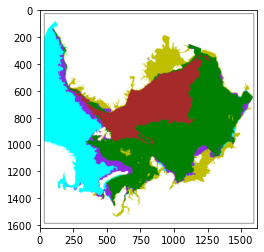

In [268]:
plt.imshow(np.load(aari_npy_files[0]))

In [312]:

for aari_npy_file, sigmod0_npy_file in zip(aari_npy_files, sigmod0_npy_files):
    aari_array = np.load(aari_npy_file)
    sigmod0_array = np.load(sigmod0_npy_file)
    new_aari_array = np.full(shape=aari_array.shape[:2], fill_value=0)
    for i in range(3):
        new_aari_array += aari_array[:,:,i]
    new_aari_array[new_aari_array == 765] = 1
    new_aari_array[new_aari_array == 128] = 2
    new_aari_array[new_aari_array == 510] = 3
    new_aari_array[new_aari_array == 249] = 4
    new_aari_array[new_aari_array == 382] = 5
    new_aari_array[new_aari_array == 407] = 6
    
    np.save(aari_npy_dir + r'\\normail_npy\\' + sigmod0_npy_file.split('\\')[-1],new_aari_array)
    
        

large_num_index = np.argsort(plt.hist(new_aari_array.flatten(),bins=765)[0])[-10:]
plt.hist(new_aari_array.flatten(),bins=765)[1][large_num_index]

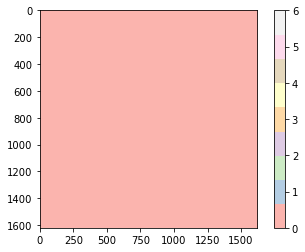

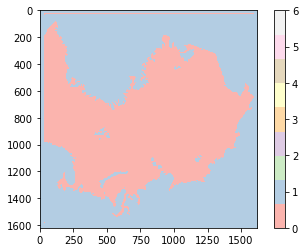

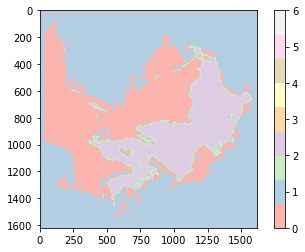

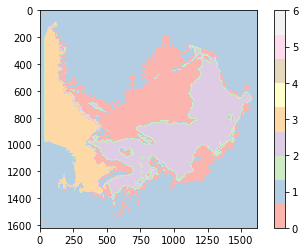

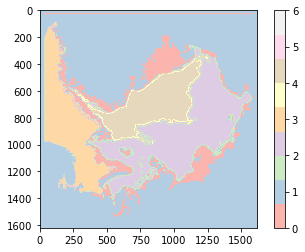

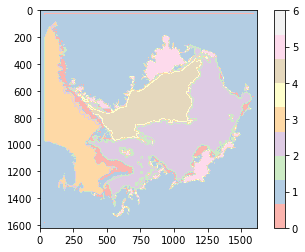

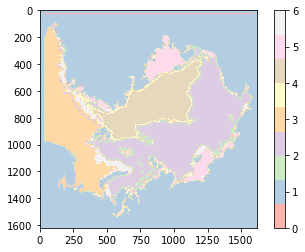

In [257]:
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()

 
look[new_aari_array == 765] = 1 
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()

look[new_aari_array == 128] = 2 
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()

look[new_aari_array == 510] = 3 
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()

look[new_aari_array == 249] = 4 
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()

look[new_aari_array == 382] = 5
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()

look[new_aari_array == 407] = 6
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()


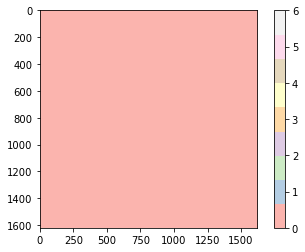

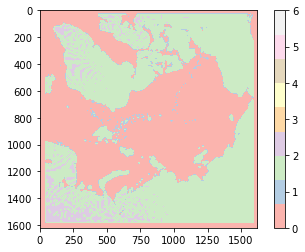

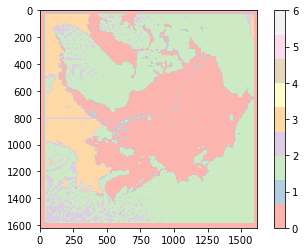

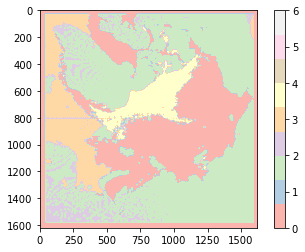

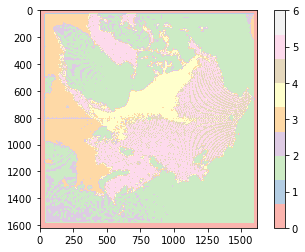

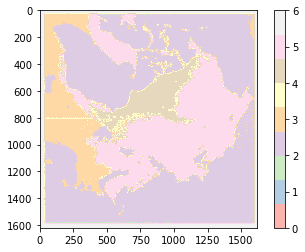

In [218]:
look[new_osi_array == 0] = 1 
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()

look[new_osi_array == 128] = 2 
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()

look[new_osi_array == 384] = 3 
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()

look[new_osi_array == 403] = 4 
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()

look[new_osi_array == 502] = 5
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()

look[new_osi_array == 765] = 6
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()


In [3]:
def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
    return input_image, input_mask

In [4]:
@tf.function
def load_image_train(datapoint):
    input_image = tf.image.resize(datapoint['image'], (1620, 1620))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (1620, 1620))
    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        input_mask = tf.image.flip_left_right(input_mask)
    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

In [5]:
TRAIN_LENGTH = image_count
BATCH_SIZE = 2
BUFFER_SIZE = 2
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

NameError: name 'image_count' is not defined

In [10]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(load_and_preprocess_image(display_list[i]))
        plt.axis('off')
    plt.show()

InvalidArgumentError: Expected image (JPEG, PNG, or GIF), got unknown format starting with '\223NUMPY\001\000v\000{\'desc' [Op:DecodeJpeg]

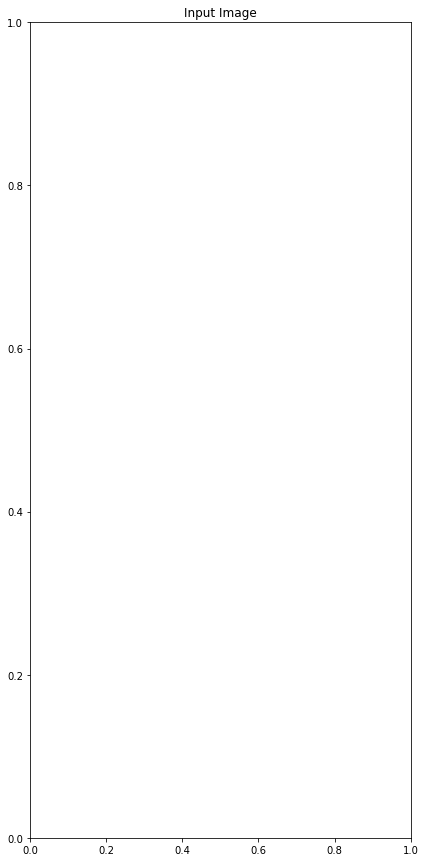

In [12]:
sample_image, sample_mask = training_path[0]
display([sample_image, sample_mask])

In [12]:
OUTPUT_CHANNELS = 3

In [13]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[1620, 1620, 3], include_top=False)

# 使用这些层的激活设置
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
layers = [base_model.get_layer(name).output for name in layer_names]

# 创建特征提取模型
down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

down_stack.trainable = False

# START

In [1]:
from IPython.display import clear_output
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
from skimage import exposure
from matplotlib.patches import Polygon
from RSData import *
from HaiYangData import *
from tensorflow_examples.models.pix2pix import pix2pix
from sklearn.metrics import confusion_matrix
from sea_ice_model import *
from tensorflow.keras.callbacks import ReduceLROnPlateau

import random
import glob
import tensorflow.keras
import tensorflow.keras.backend as K
import matplotlib.image as imgplt
import PIL.Image as Image
import os
import matplotlib.patches as mpatches
import h5py
import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np
import glob
import cv2
import io
import shapefile
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [3]:
train_dir = r'd:\python_workspace\sea_ice_classification\training7'

aari_npy_dir = glob.glob(r'E:\python_workfile\sea_ice_classification\training7\dataset\aari\npy_real\small_size\npy')
aari_img_dir = r'E:\python_workfile\sea_ice_classification\training7\dataset\aari\npy_real\small_size\pic_gray'
sigmod0_img_dir = r'E:\python_workfile\sea_ice_classification\training7\dataset\input_value\VV_ratio_polaration_use\small_size'

aari_npy_dir_val = r'E:\python_workfile\sea_ice_classification\training7\dataset\aari\npy_real\small_size\npy\val'
aari_img_dir_val = r'E:\python_workfile\sea_ice_classification\training7\dataset\aari\npy_real\small_size\pic_gray\val'
sigmod0_img_dir_val = r'E:\python_workfile\sea_ice_classification\training7\dataset\input_value\VV_ratio_polaration_use\small_size\val'
 
sigmod0_img_files = glob.glob(sigmod0_img_dir + '\\*.png')
aari_img_files = glob.glob(aari_img_dir + '\\*.png')

sigmod0_img_files_val = glob.glob(sigmod0_img_dir_val + '\\*.png')
aari_img_files_val = glob.glob(aari_img_dir_val + '\\*.png')

In [26]:
output_save_path = r'E:\python_workfile\sea_ice_classification\training7\output\VV_HH_polarratio'

parameter = r'VV_ratio_polaration'

# classes表示不同类别的名称，比如这有5个类别
classes = ['nials', 'young ice', 'first year ice', 'old ice', 'fast ice']


weight_save_path = r'E:\python_workfile\sea_ice_classification\training7\model_checkpoint'+f'\\{parameter}'

tensorboard_path = r'E:\python_workfile\sea_ice_classification\training7\tensorboard'+f'\\{parameter}'

In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [9]:


image_paths = sigmod0_img_files
mask_paths = aari_img_files
training_path = [[image,mask]for image,mask in zip(image_paths,mask_paths)]
random.shuffle(training_path)
image_count = len(training_path)
path_slice = int(2*(image_count/3))

In [10]:
train_path = training_path[:path_slice]
test_path = training_path[path_slice:]

In [11]:
def getBinaryTensor(imgTensor, boundary = 220): 
    one = tf.ones_like(imgTensor) 
    zero = tf.zeros_like(imgTensor) 
    return tf.where(imgTensor > boundary, one, zero)

def preprocess_mask(mask):
    mask_arr = np.array(mask)
    return mask_arr

def split_train_paths(paths):
    train_img_paths = [path[0] for path in paths]
    train_mask_paths = [path[1] for path in paths]
    return train_img_paths, train_mask_paths

def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128])
    #   image = tf.image.resize(image, [1565, 1565])
    image /= 255.0  # normalize to [0,1] range

    return image

def load_and_preprocess_mask(path):
    mask = tf.io.read_file(path)
#     mask = np.array(mask)
    mask = tf.image.decode_jpeg(mask, channels=1)
    mask = tf.image.resize(mask, [128, 128])
#     mask_arr = np.array(mask)
#     mask -= 220.0
#     mask /= 10
#     mask_arr[mask_arr == 254] = 0
#     mask_arr[mask_arr == 75] = 1
#     mask_arr[mask_arr == 178] = 2
#     mask_arr[mask_arr == 78] = 3
#     mask_arr[mask_arr == 169] = 4
#     mask_arr[mask_arr == 92] = 5
#     mask_arr[mask_arr == 0] = 6
#     mask_arr[mask_arr >6] = 0

#     index = tf.where(mask == 254)
#     mask[index].assgin(0)
    
    return mask
#     return mask



In [12]:
train_image_paths, train_mask_paths = split_train_paths(train_path)
test_image_paths, test_mask_paths = split_train_paths(test_path)


train_img_path_ds = tf.data.Dataset.from_tensor_slices(train_image_paths)
train_mask_path_ds = tf.data.Dataset.from_tensor_slices(train_mask_paths)
test_img_path_ds = tf.data.Dataset.from_tensor_slices(test_image_paths)
test_mask_path_ds = tf.data.Dataset.from_tensor_slices(test_mask_paths)

val_img_path_ds = tf.data.Dataset.from_tensor_slices(sigmod0_img_files_val)
val_mask_path_ds = tf.data.Dataset.from_tensor_slices(aari_img_files_val)



In [13]:



train_image_ds = train_img_path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
train_mask_ds = train_mask_path_ds.map(load_and_preprocess_mask, num_parallel_calls=AUTOTUNE)
test_image_ds = test_img_path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
test_mask_ds = test_mask_path_ds.map(load_and_preprocess_mask, num_parallel_calls=AUTOTUNE)
val_image_ds = val_img_path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
val_mask_ds = val_mask_path_ds.map(load_and_preprocess_mask, num_parallel_calls=AUTOTUNE)

In [14]:
train = tf.data.Dataset.zip((train_image_ds,train_mask_ds))
test = tf.data.Dataset.zip((test_image_ds,test_mask_ds))
val = tf.data.Dataset.zip((val_image_ds,val_mask_ds))

In [15]:
TRAIN_LENGTH = image_count
BATCH_SIZE = 32
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [16]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)
val_dataset = val.batch(1)

In [17]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i],loc='center')
        if i==0:
            display_list[i] = (display_list[i] * 20 / 255) - 25
            plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]),vmin=-25,vmax=-5,cmap = plt.cm.jet)
#             plt.colorbar(fraction=0.05, pad=0.05)
            plt.axis('off')
            
        else:
            plt.imshow(display_list[i],vmin=0,vmax=5,cmap = plt.cm.jet)
#             plt.colorbar(fraction=0.05, pad=0.05)
            color = ['blue','dodgerblue', 'aquamarine', 'greenyellow', 'orangered','brown']
            labels = ['no data', 'first year ice', 'old ice', 'fast ice','young ice','nilas']
            #用label和color列表生成mpatches.Patch对象，它将作为句柄来生成legend
            patches = [ mpatches.Patch(color=color[i], label="{:s}".format(labels[i]) ) for i in range(len(color)) ] 
            plt.legend(loc = 'best',handles=patches, bbox_to_anchor=(0.95,1.12), ncol=4)
            plt.axis('off')
    plt.show()

def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

def show_predictions(dataset=None, num=1):
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])

class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        show_predictions()
        print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

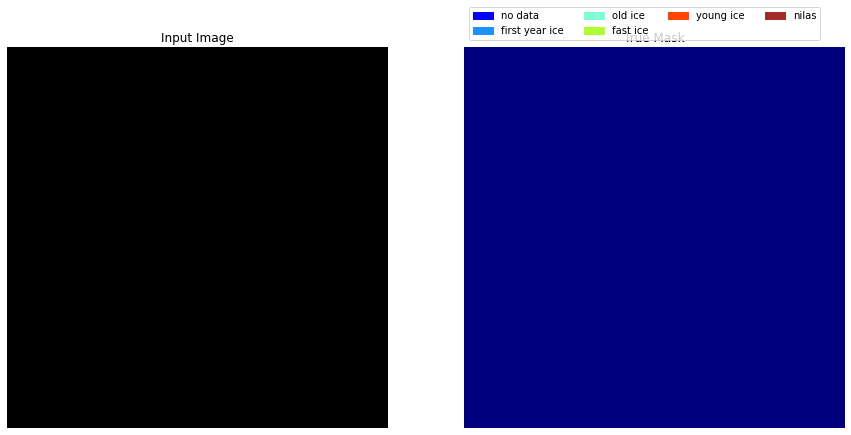

In [18]:
for image, mask in train.take(1):
    sample_image, sample_mask = image, mask
display([sample_image, sample_mask])

In [19]:
OUTPUT_CHANNELS = 6

In [20]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128,128 , 3], include_top=False)

# 使用这些层的激活设置
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
layers = [base_model.get_layer(name).output for name in layer_names]

# 创建特征提取模型
down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

down_stack.trainable = False

In [21]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [22]:
def unet_model(output_channels):
    inputs = tf.keras.layers.Input(shape=[128,128 , 3])
    x = inputs

    # 在模型中降频取样
    skips = down_stack(x)
    x = skips[-1]
    skips = reversed(skips[:-1])

    # 升频取样然后建立跳跃连接
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

    # 这是模型的最后一层
    last = tf.keras.layers.Conv2DTranspose(
        output_channels, 3, strides=2,
        padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

In [23]:
model = unet_model(OUTPUT_CHANNELS)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
# 加载此前训练的数据
# model.load_weights(weight_save_path+'\\weights.20-0.09.hdf5')


# 模型保存
checkpoint = tf.train.Checkpoint(myModel = model,myOptimizer=model.optimizer)
manager = tf.train.CheckpointManager(checkpoint, directory=r'E:\python_workfile\sea_ice_classification\training7\model_checkpoint\VV_HH_polarratio',
                                    checkpoint_name='model.ckpt', max_to_keep = 200)

#恢复参数
model_to_be_restored = model
checkpoint = tf.train.Checkpoint(myModel = model_to_be_restored)
checkpoint.restore(tf.train.latest_checkpoint(train_dir + '\\model_checkpoint\\VV_ratio_polaration_use'))

tf.keras.utils.plot_model(model, show_shapes=True)

In [24]:
EPOCHS = 50
VAL_SUBSPLITS = 5
VALIDATION_STEPS = TRAIN_LENGTH//BATCH_SIZE//VAL_SUBSPLITS



In [27]:
weight_save_path

'E:\\python_workfile\\sea_ice_classification\\training7\\model_checkpoint\\VV_ratio_polaration'

In [28]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
tensorboard=tensorflow.keras.callbacks.TensorBoard(log_dir=tensorboard_path,write_grads=True,histogram_freq=0)
modelcheckpoint = tensorflow.keras.callbacks.ModelCheckpoint(filepath=weight_save_path+r'\\weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=5)
callbacks_list = [tensorboard,modelcheckpoint]

# summary_writer = tf.summary.create_file_writer('./tensorboard/VV_HH_polarratio')
model_history = model.fit(train_dataset, epochs=EPOCHS,
                              steps_per_epoch=STEPS_PER_EPOCH,
                              validation_steps=VALIDATION_STEPS,
                              validation_data=test_dataset,
                              callbacks=callbacks_list)

Epoch 1/50
  1/583 [..............................] - ETA: 0s - loss: 1.7561 - accuracy: 0.2406WARNING:tensorflow:From C:\Users\user\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
583/583 [==============================] - 46s 79ms/step - loss: 0.2298 - accuracy: 0.9179 - val_loss: 0.1477 - val_accuracy: 0.946374 - accuracy: 0 - ETA: 33s - loss: 0.4971 - accuracy: 0.82 - ETA: 33s - loss: 0.4926 - accuracy: 0.82 - ETA: 33s - loss: 0.4888 - accuracy:  - ETA: 32s - loss: 0.4729 - accuracy: 0.83 - ETA: 32s - loss: 0.4689 - accuracy: 0.833 - ETA: 32s - loss: 0.466 - ETA: 31s - loss: 0.4263  - ETA: 29s - loss: 0.4012 - accuracy: 0 - ETA: 29s  - ETA: 31s - loss: 0.3568 - accuracy:  - ETA: 30s - loss: 0.3519 - accuracy: 0.87 -  - ETA: 26s - loss: 0.3207 - ac - ETA: 25s - loss: 0.3128

manager.save()

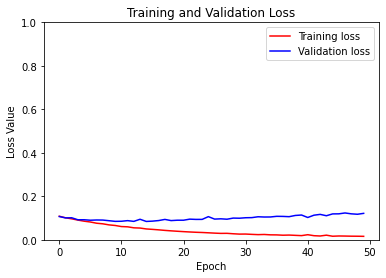

In [29]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(EPOCHS)
# epochs = range(1300)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [23]:
accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']

# epochs = range(EPOCHS)
epochs = range(EPOCHS)
plt.figure()
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

NameError: name 'model_history' is not defined

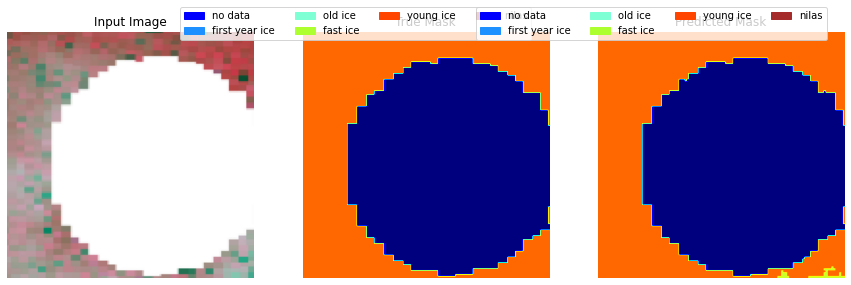

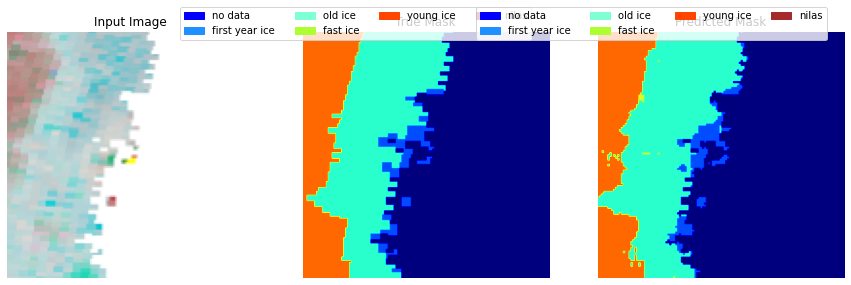

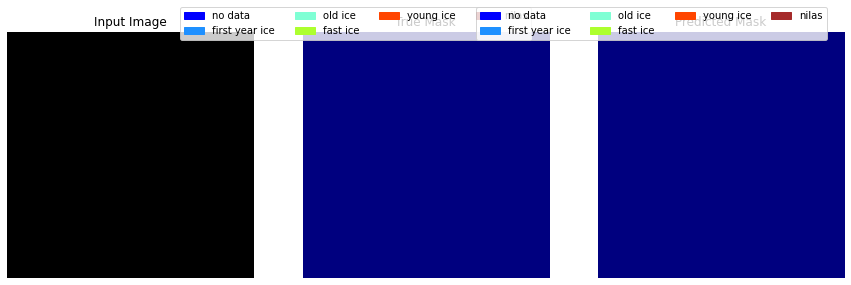

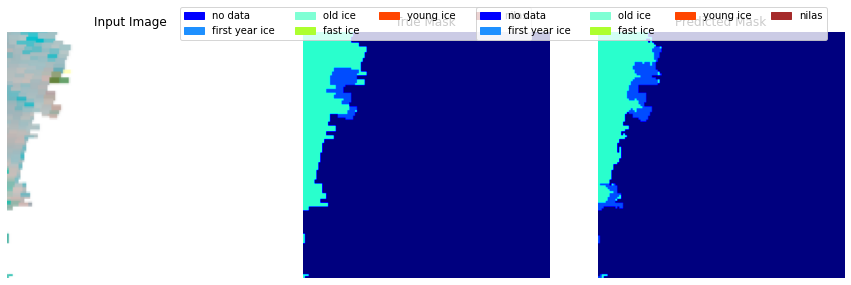

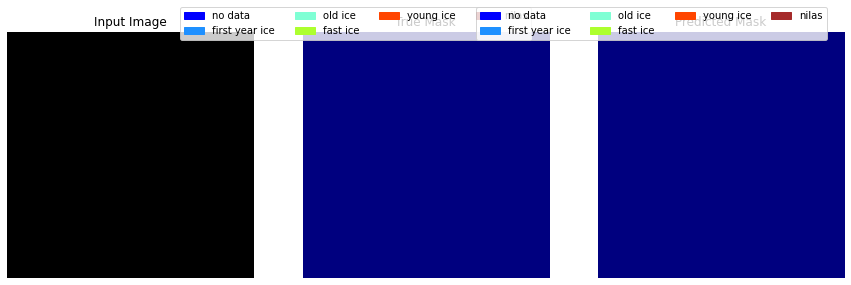

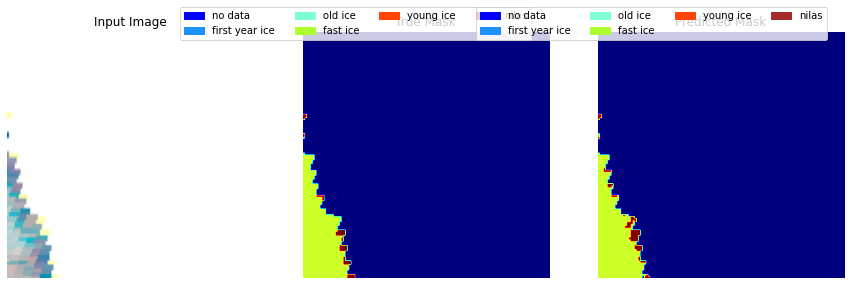

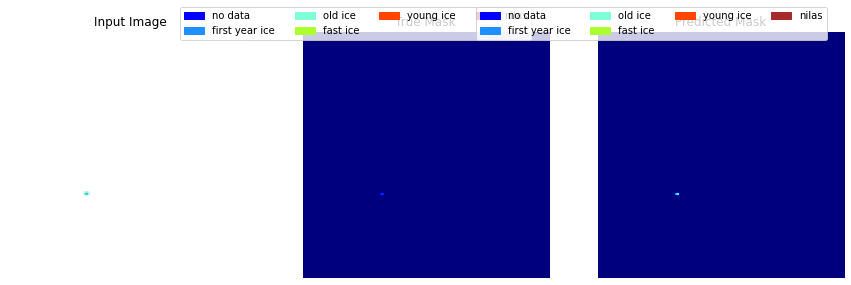

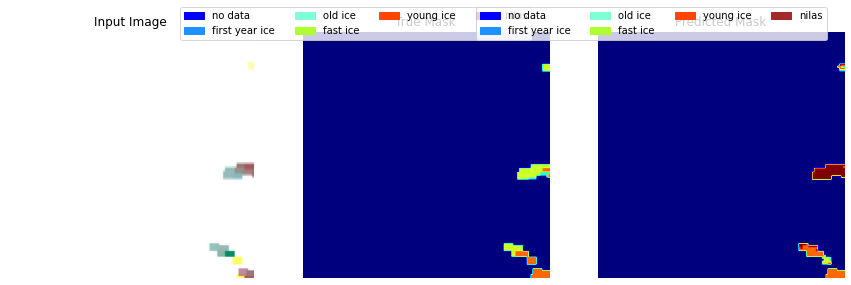

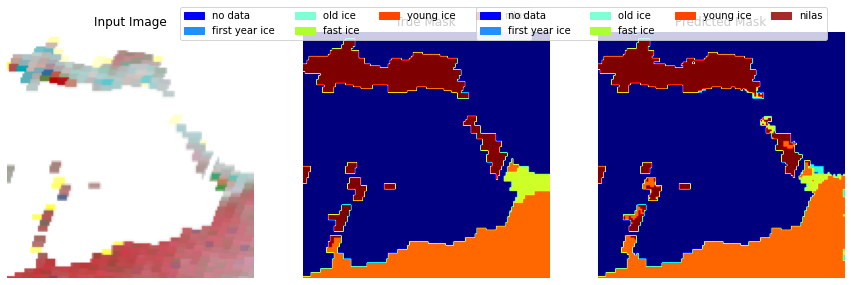

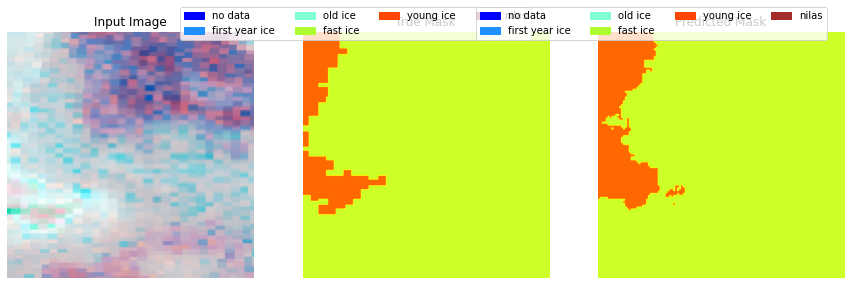

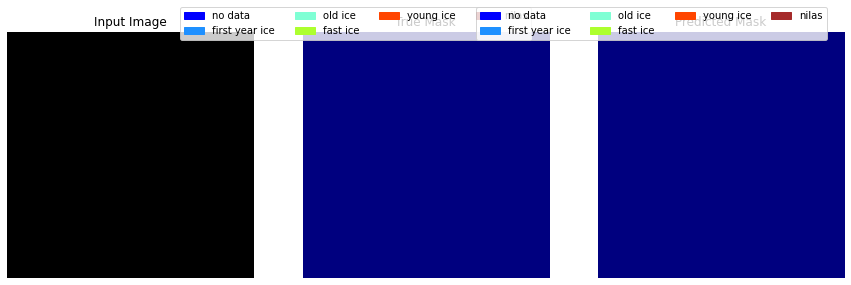

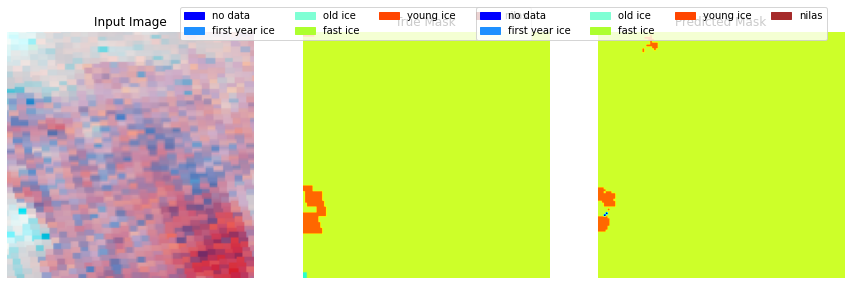

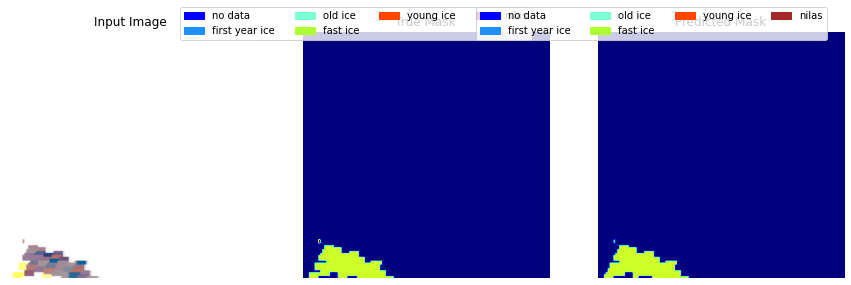

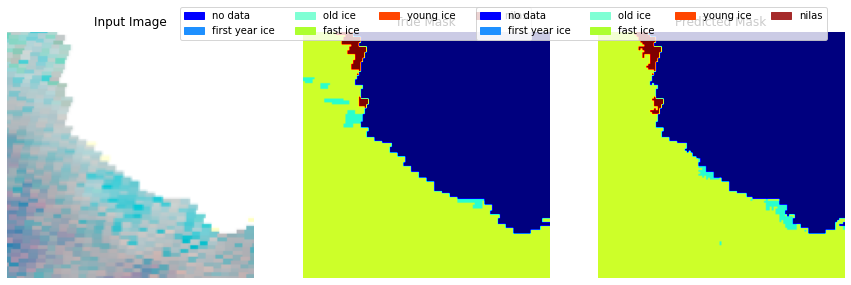

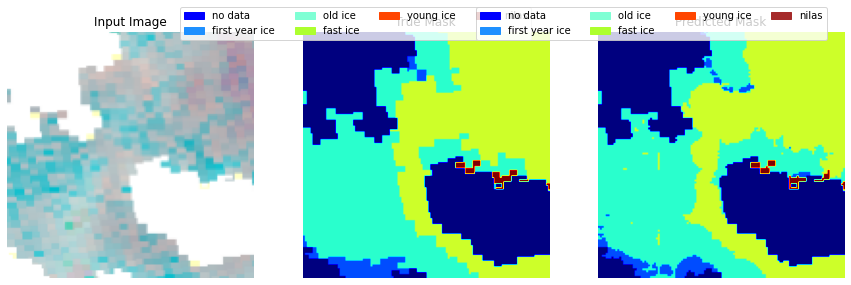

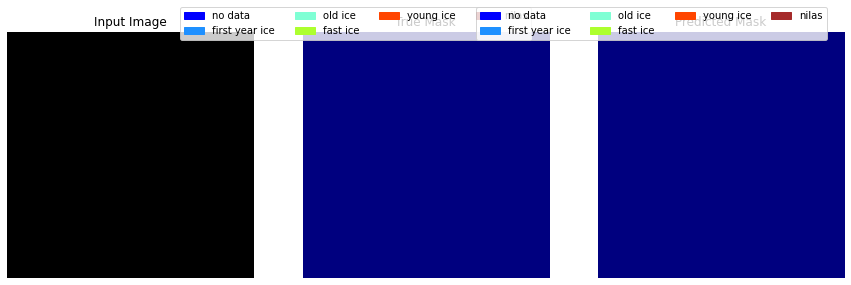

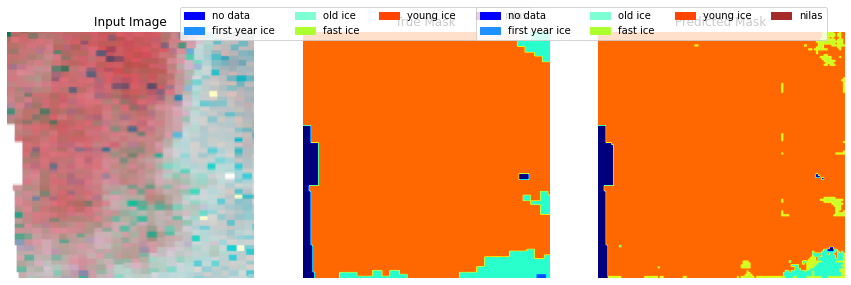

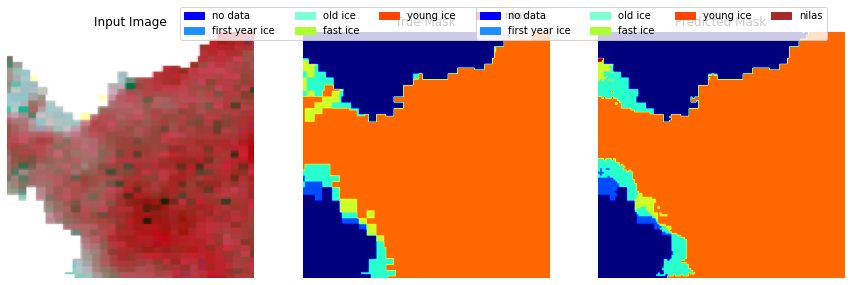

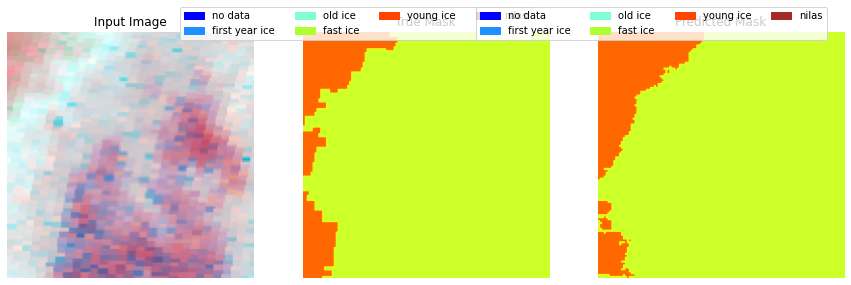

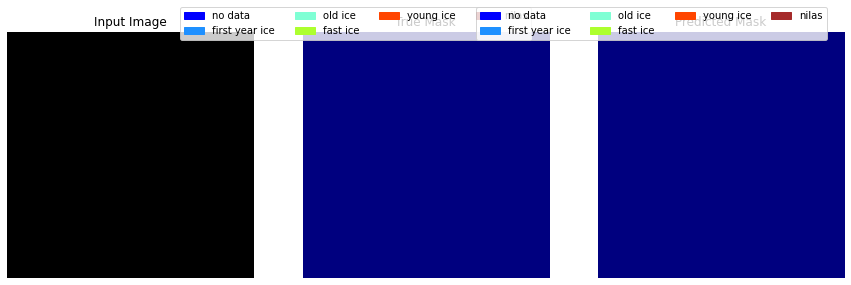

In [68]:

show_predictions(test_dataset, 20)  

In [65]:
def show_predictions_and_save(dataset, num,save_path,metric_array=None):
    if metric_array:
        mask_array = np.array([])
        pred_array = np.array([])
        for i,(image, mask) in enumerate(dataset.take(num)):

            pred_mask = model.predict(image)
            # 在计算混淆矩阵的的情况下输出图片
            display_val_and_save([mask[0], create_mask(pred_mask)],save_path,i+1)
            

            pred_mask = tf.argmax(pred_mask, axis=-1)
            pred_mask = pred_mask[..., tf.newaxis]
            # 是否屏蔽掉没有数据的点
#             mask_np_array = (mask[0][mask[0]!=0]).numpy()
#             pred_mask_np_array = (pred_mask[0][mask[0]!=0]).numpy()
            mask_np_array = (mask[0]).numpy()
            pred_mask_np_array = (pred_mask[0]).numpy()
            mask_array=np.append(mask_array, mask_np_array)
            pred_array = np.append(pred_array, pred_mask_np_array)

        return mask_array,pred_array
                
    else:
        for i,(image, mask) in enumerate(dataset.take(num)):
            pred_mask = model.predict(image)
            display_val_and_save([mask[0], create_mask(pred_mask)],save_path,i+1)


In [72]:
def display_val_and_save(display_list,save_path,number):
    if number < 10:
        day = '00' + str(number)
    elif 10<= number < 100:
        day = '0' + str(number)
    else:
        day = str(number)
        
    for i,mask in enumerate(display_list):
        np.save(save_path+f'\\pridect\\npy\\{day}.npy',mask)
        if i==0:
            plt.figure(figsize=(1, 1))
            plt.imshow(mask,vmin=0,vmax=5,cmap = plt.cm.jet)
            plt.axis('off')
            plt.margins(0,0)
#             plt.savefig(save_path+f'\\true\\{day}.png',dpi = 170, bbox_inches='tight',pad_inches = 0)
            plt.close()
        elif i==1:
            plt.figure(figsize=(1, 1))
            plt.imshow(mask,vmin=0,vmax=5,cmap = plt.cm.jet)
            plt.axis('off')
            plt.margins(0,0)
            plt.savefig(save_path+f'\\pridect\\{day}.png',dpi = 170, bbox_inches='tight',pad_inches = 0)
            plt.close()
#     plt.show()

In [69]:
output_save_path

'E:\\python_workfile\\sea_ice_classification\\training7\\output\\VV_HH_polarratio'

In [73]:
mask_array,pred_array = show_predictions_and_save(val_dataset, 637,output_save_path,metric_array=True)  

cm = confusion_matrix(mask_array,pred_array)

cm = cm[1:,1:]

In [70]:
true_pos = np.diag(cm) 
precision = np.sum(true_pos / np.sum(cm, axis=0))
recall = np.sum(true_pos / np.sum(cm, axis=1))

In [71]:
accury = np.sum(true_pos)/np.sum(cm)
plot_confusion_matrix(classes,cm, savename=output_save_path+r'\confusion_matrix_decisition '+parameter+'.png', title=f'confusion matrix accury:{accury} ')

# 输入验证数据集并拼接

In [34]:

IMAGES_FORMAT = ['.png', '.png']  # 图片格式
IMAGE_SIZE = 128  # 每张小图片的大小
IMAGE_ROW = 7  # 图片间隔，也就是合并成一张图后，一共有几行
IMAGE_COLUMN = 7  # 图片间隔，也就是合并成一张图后，一共有几列
IMAGE_SAVE_PATH = r'E:\python_workfile\sea_ice_classification\training7\output\lat_lon_ratio\pridect\full_png'  # 图片转换后的地址

In [35]:
# 获取图片集地址下的所有图片名称
image_files = glob.glob(r'E:\python_workfile\sea_ice_classification\training7\output\lat_lon_ratio\pridect\*.png')


In [36]:
# 定义图像拼接函数
def image_compose(images_path_list,img_save_path,name,row,col):
    if len(images_path_list) != row * col:
        raise ValueError("合成图片的参数和要求的数量不能匹配！")
    to_image = Image.new('RGB', (IMAGE_COLUMN * IMAGE_SIZE, IMAGE_ROW * IMAGE_SIZE))  # 创建一个新图
    # 循环遍历，把每张图片按顺序粘贴到对应位置上
    for y in range(1, IMAGE_ROW + 1):
        for x in range(1, IMAGE_COLUMN + 1):
            from_image = Image.open(images_path_list[IMAGE_COLUMN * (y - 1) + x - 1]).resize(
                (IMAGE_SIZE, IMAGE_SIZE), Image.ANTIALIAS)
            to_image.paste(from_image, ((x - 1) * IMAGE_SIZE, (y - 1) * IMAGE_SIZE))
    return to_image.save(img_save_path+f'\\{name}.png')  # 保存新图


In [37]:
image_compose(image_files[:49],IMAGE_SAVE_PATH,1,7,7)  # 调用函数

In [38]:
ture_mask_files_val_list = [image_files[i:i+49] for i in range(0,len(image_files),49)]

In [39]:
for i,file_list in enumerate(ture_mask_files_val_list):
    image_compose(file_list,IMAGE_SAVE_PATH,i,7,7)

# 添加图例

In [24]:
full_pngs = glob.glob(r'E:\python_workfile\sea_ice_classification\training7\output\lat_lon_ratio\pridect\full_png\*.png')

In [26]:
color = ['blue','dodgerblue', 'aquamarine', 'greenyellow', 'orangered','brown']
labels = ['no data', 'first year ice', 'old ice', 'fast ice','young ice','nilas']
#用label和color列表生成mpatches.Patch对象，它将作为句柄来生成legend
patches = [ mpatches.Patch(color=color[i], label="{:s}".format(labels[i]) ) for i in range(len(color)) ] 


NODATA=mpatches.Patch(color='darkblue', label='No Data')
FI = mpatches.Patch(color='maroon', label='Fast Ice')
OI = mpatches.Patch(color='orangered', label='Old Ice')
FYI = mpatches.Patch(color='greenyellow', label='First Year Ice')
YI = mpatches.Patch(color='aqua', label='Young Ice')
N = mpatches.Patch(color='b', label='Nilas')


In [27]:

val_dir = r'E:\python_workfile\sea_ice_classification\training6\csv\add_threshold\val'
val_files = glob.glob(val_dir+'\\*.csv')
val_day = [val_file.split('\\')[-1].split('.')[0] for val_file in val_files]


In [43]:
save_path = r'E:\python_workfile\sea_ice_classification\training7\output\lat_lon_ratio\pridect\full_png'

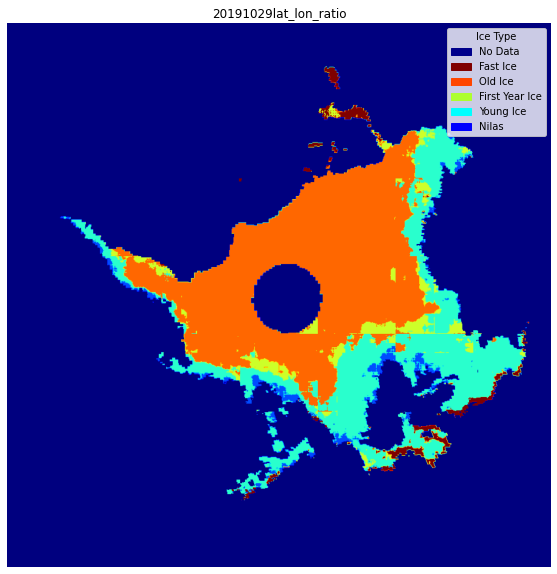

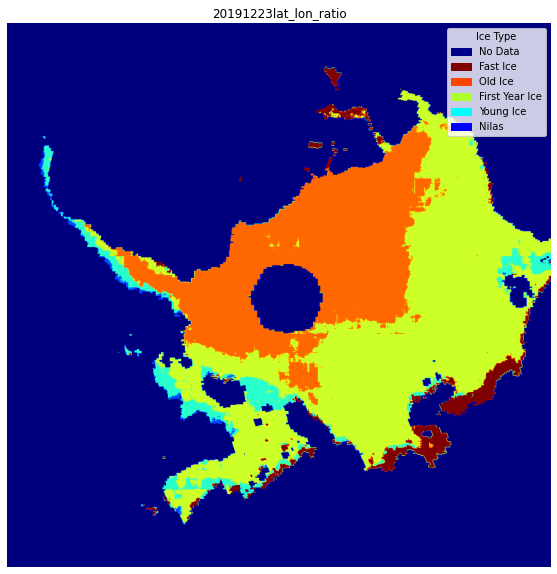

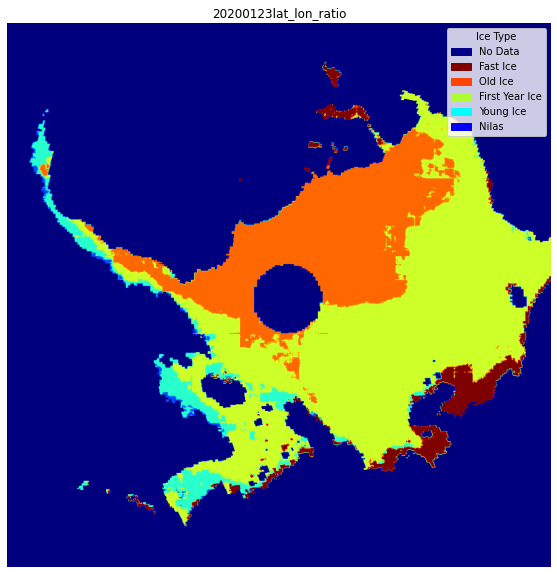

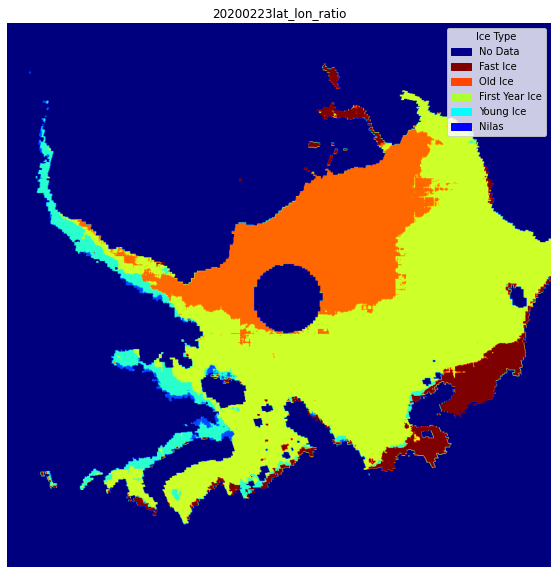

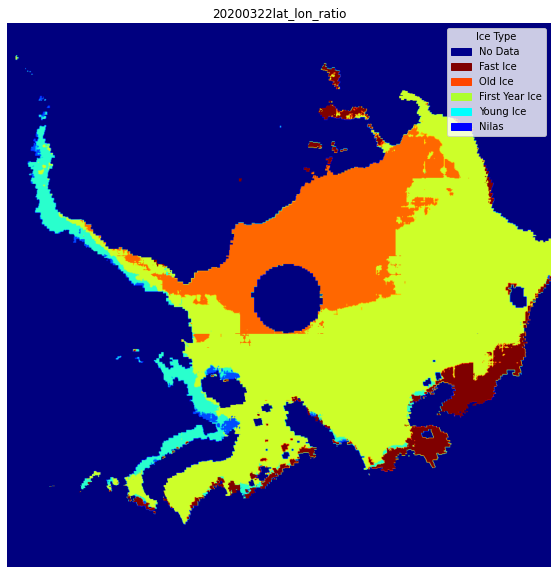

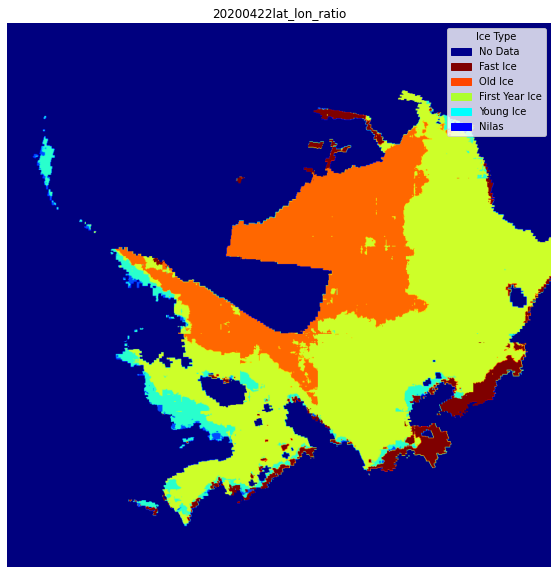

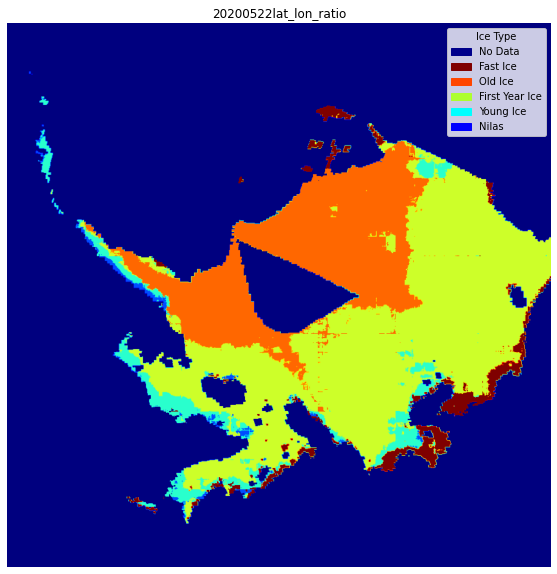

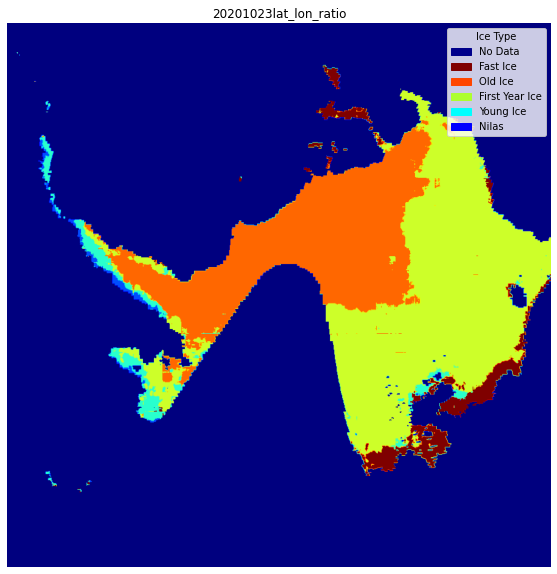

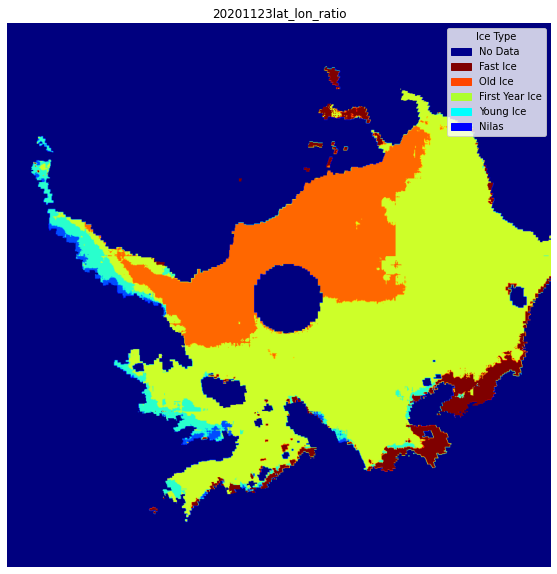

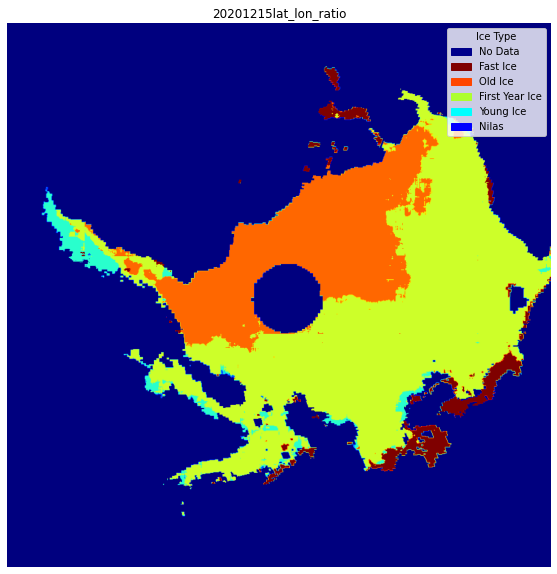

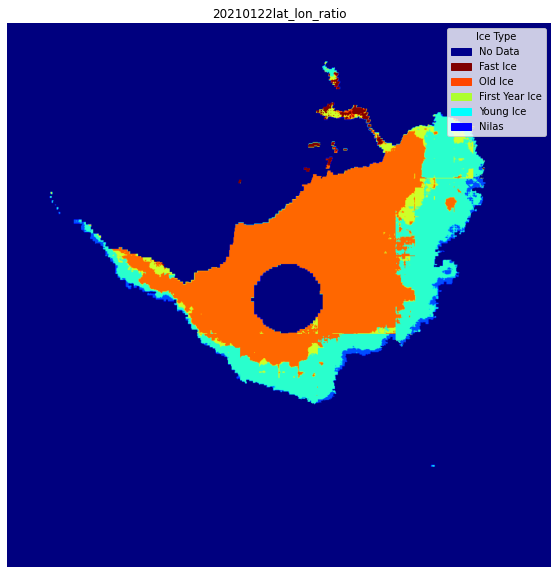

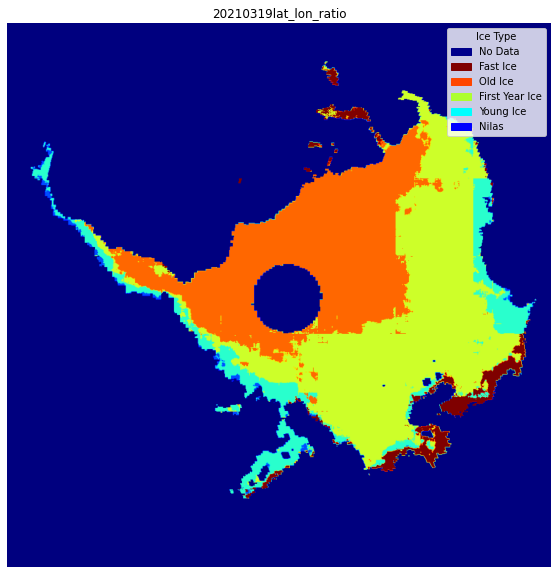

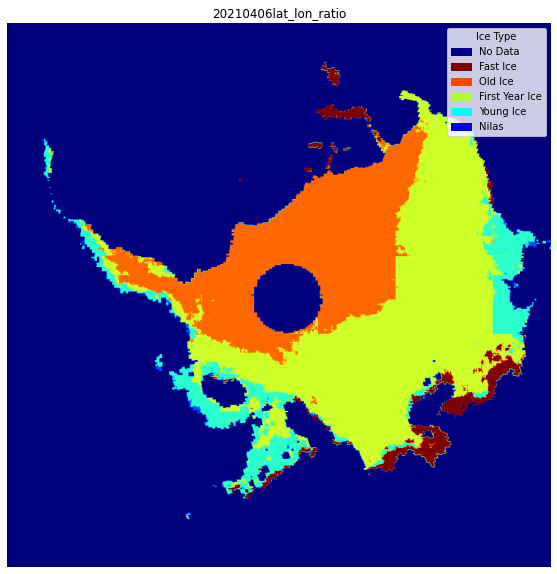

In [44]:
for day,full_png in zip(val_day,full_pngs):
    img = cv2.imread(full_png)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.legend(loc='upper right',handles=[NODATA,FI,OI ,FYI, YI ,N], title='Ice Type')
    plt.title(day+parameter)
    plt.axis('off')
    plt.savefig(save_path+'\\'+day+'.png')

In [28]:
img = cv2.imread(full_pngs[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [37]:
img.shape

(896, 896, 3)

In [46]:
(img[:,:,2]==127).shape

(896, 896)

In [47]:
img[img[:,:,2]==127,:]=255

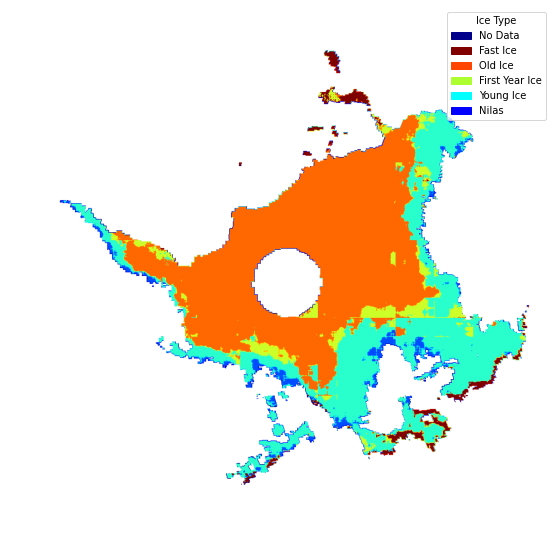

In [48]:
fig = plt.figure(figsize=(10,10))
plt.imshow(img)
plt.legend(loc='upper right',handles=[NODATA,FI,OI ,FYI, YI ,N], title='Ice Type')
plt.axis('off')
plt.show()
# plt.savefig(save_path+'\\'+day+'.png')

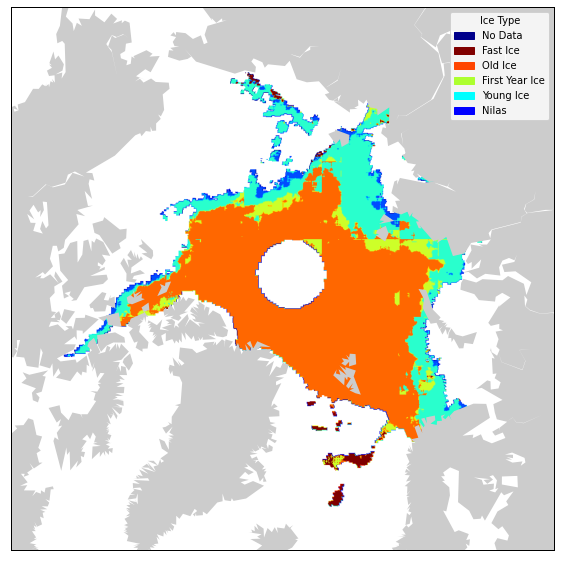

In [82]:
fig = plt.figure(figsize=(10,10))
hy_m = Basemap(projection='npaeqd', boundinglat=64, lon_0=343., resolution='c')
#     hy_m.pcolormesh(x_map, y_map, data=grid_array_predict, cmap=plt.cm.jet,shading = 'auto',vmax=5,vmin=1,latlon = True)
hy_m.imshow(img)
hy_m.fillcontinents()
hy_m.drawmapboundary()

# hy_m.drawparallels(np.arange(-90., 120., 10.), labels=[1, 0, 0, 0])
# hy_m.drawmeridians(np.arange(-180., 180., 60.), labels=[0, 0, 0, 1])

plt.legend(loc='upper right',handles=[NODATA,FI,OI ,FYI, YI ,N], title='Ice Type')

In [67]:
img1 = cv2.flip(img,0)

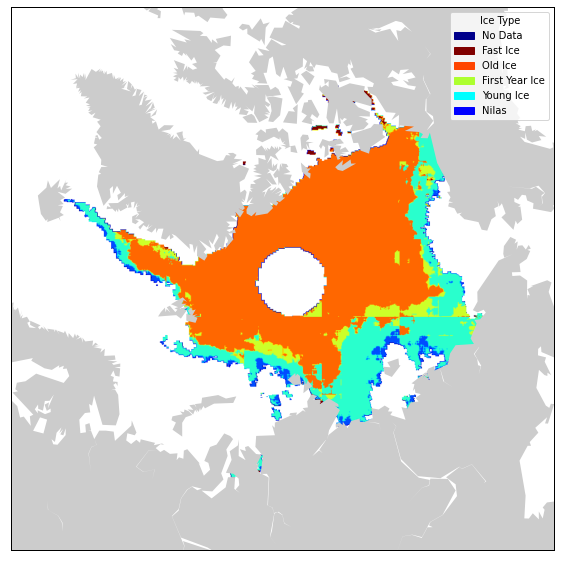

In [79]:
fig = plt.figure(figsize=(10,10))
hy_m = Basemap(projection='npaeqd', boundinglat=62, lon_0=90., resolution='c')
#     hy_m.pcolormesh(x_map, y_map, data=grid_array_predict, cmap=plt.cm.jet,shading = 'auto',vmax=5,vmin=1,latlon = True)
hy_m.imshow(img1)
hy_m.fillcontinents()
hy_m.drawmapboundary()

# hy_m.drawparallels(np.arange(-90., 120., 10.), labels=[1, 0, 0, 0])
# hy_m.drawmeridians(np.arange(-180., 180., 60.), labels=[0, 0, 0, 1])

plt.legend(loc='upper right',handles=[NODATA,FI,OI ,FYI, YI ,N], title='Ice Type')

In [80]:
c